# 📋 Análisis de Entrega y Recepción de Equipos
Este notebook analiza un archivo de entregas y recepciones de bienes institucionales, procesando y visualizando los datos disponibles.

Práctica 1: Uso de aplicaciones colaborativas para el uso de herramientas de inteligencia artificial

Curicama Curicama Freddy Daniel

In [1]:
# 📦 Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style='whitegrid')

In [3]:
# 📁 Subir archivo desde tu PC
from google.colab import files
uploaded = files.upload()

Saving Equipos.csv to Equipos.csv


In [4]:
# 📄 Cargar archivo CSV delimitado por punto y coma
datos = pd.read_csv('Equipos.csv', sep=';', encoding='utf-8')

# Ver las primeras filas y dimensiones
print("Dimensiones del archivo (filas, columnas):", datos.shape)
datos.head()

Dimensiones del archivo (filas, columnas): (10091, 25)


,Item,FECHA,UNIDAD ENTREGA,FUNCIONARIO ENTREGA,UNIDAD RECIBE,FUNCIONARIO RECIBE,RESPONSABLE DE BIENES,CODIGO ACTUAL / ANTERIOR,NRO. SERIE,MARCA,...,ESTADO,NOTA,LINK FIRMADO,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1.0,2024-sep-06,UNIDAD DE TECNOLOGIAS DE LA INFORMACION Y COMU...,FREDDY CURICAMA,PROCESOS EN EL EXTERIOR,ANDRES PAREDES,NO APLICA,SC,PF4A0V8Q,LENOVO,...,BUENO,ENTREGA A VOCAL JUNTA EXTERIOR,https://drive.google.com/file/d/10pVLaMzSARwQh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2024-sep-12,UNIDAD DE TECNOLOGIAS DE LA INFORMACION Y COMU...,SEBASTIAN ARIAS,SECRETARIA GENERAL,CRISTIAN MOLINA,NO APLICA,27995924,MP1HMLSH,LENOVO,...,BUENO,EQUIPOS PRESTADOS PARA INSCRIPCION DE CANDIDATOS,https://drive.google.com/file/d/10uQQHWh4jLs8U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2024-sep-12,UNIDAD DE TECNOLOGIAS DE LA INFORMACION Y COMU...,SEBASTIAN ARIAS,SECRETARIA GENERAL,CRISTIAN MOLINA,NO APLICA,27994635,MP1HMF89,LENOVO,...,BUENO,EQUIPOS PRESTADOS PARA INSCRIPCION DE CANDIDATOS,https://drive.google.com/file/d/10uQQHWh4jLs8U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2024-sep-12,UNIDAD DE TECNOLOGIAS DE LA INFORMACION Y COMU...,SEBASTIAN ARIAS,SECRETARIA GENERAL,CRISTIAN MOLINA,NO APLICA,15867521,68TUB20755,XEROX,...,BUENO,EQUIPOS PRESTADOS PARA INSCRIPCION DE CANDIDATOS,https://drive.google.com/file/d/10uQQHWh4jLs8U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2024-sep-12,UNIDAD DE TECNOLOGIAS DE LA INFORMACION Y COMU...,SEBASTIAN ARIAS,SECRETARIA GENERAL,CRISTIAN MOLINA,NO APLICA,15867992,68HUB20845,XEROX,...,BUENO,EQUIPOS PRESTADOS PARA INSCRIPCION DE CANDIDATOS,https://drive.google.com/file/d/10uQQHWh4jLs8U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 🧹 Limpieza básica: eliminar columnas vacías o sin nombre
datos = datos.loc[:, ~datos.columns.str.contains('^Unnamed')]

# Ver columnas finales
datos.columns

Index(['Item', 'FECHA', 'UNIDAD ENTREGA', 'FUNCIONARIO ENTREGA ',
       'UNIDAD RECIBE', 'FUNCIONARIO RECIBE', 'RESPONSABLE DE BIENES',
       'CODIGO ACTUAL / ANTERIOR', 'NRO. SERIE', 'MARCA', 'MODELO', 'TIPO',
       'DESCRIPCIÓN BIENES', 'TIPO DE ACTA', 'UBICACIÓN', 'ESTADO', 'NOTA',
       'LINK FIRMADO'],
      dtype='object')

In [6]:
# ➕ Crear columnas derivadas (ejemplo: año y mes de entrega)
datos['FECHA'] = pd.to_datetime(datos['FECHA'], errors='coerce')
datos['AÑO'] = datos['FECHA'].dt.year
datos['MES'] = datos['FECHA'].dt.month

# Verificación
datos[['FECHA', 'AÑO', 'MES']].head()

<ipython-input-6-dcc3de899ec7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos['FECHA'] = pd.to_datetime(datos['FECHA'], errors='coerce')


,FECHA,AÑO,MES
0,2024-09-06,2024.0,9.0
1,2024-09-12,2024.0,9.0
2,2024-09-12,2024.0,9.0
3,2024-09-12,2024.0,9.0
4,2024-09-12,2024.0,9.0


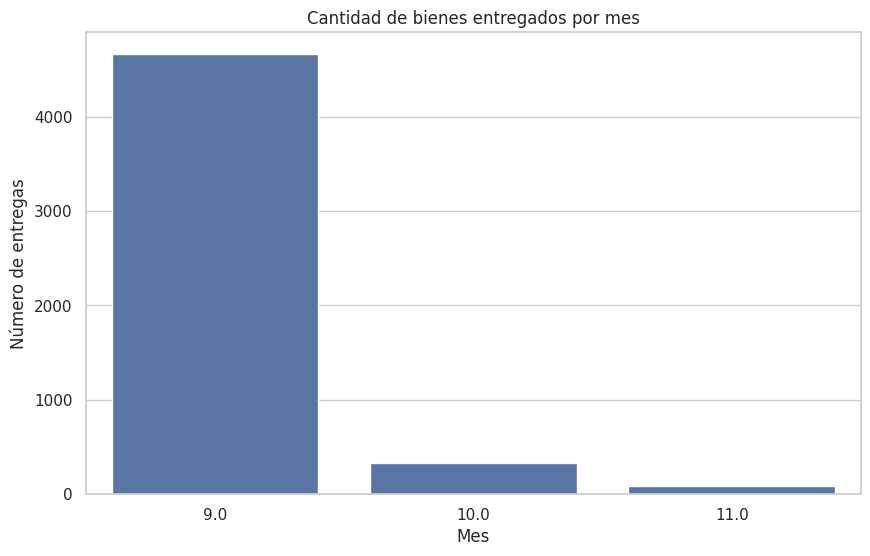

In [7]:
# 📊 Visualización 1: Cantidad de bienes entregados por mes

plt.figure(figsize=(10,6))
sns.countplot(data=datos, x='MES', order=sorted(datos['MES'].dropna().unique()))
plt.title("Cantidad de bienes entregados por mes")
plt.xlabel("Mes")
plt.ylabel("Número de entregas")
plt.show()

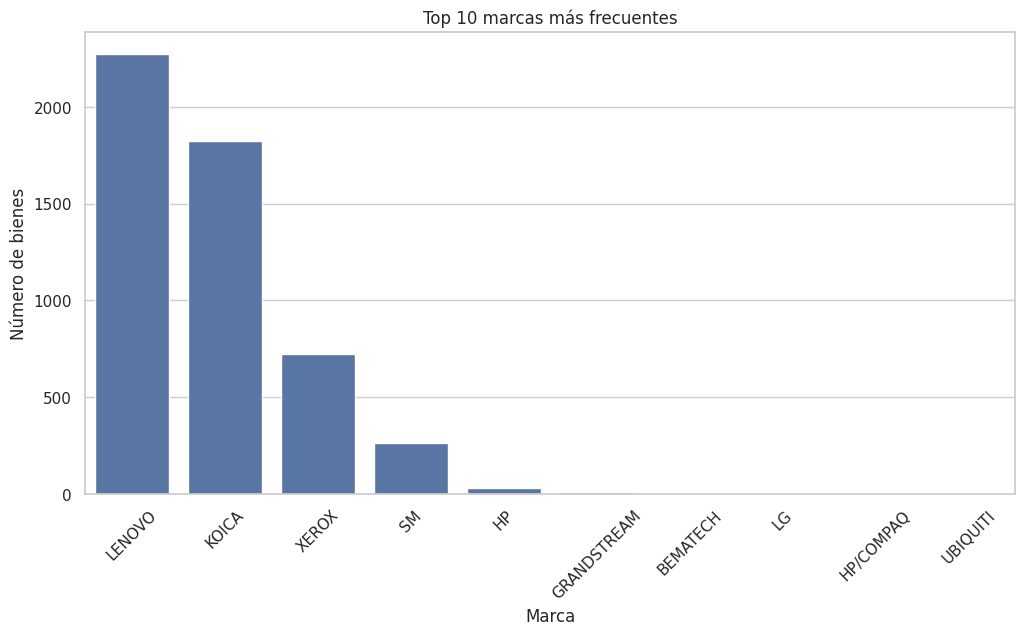

In [8]:
# 📊 Visualización 2: Marcas más frecuentes en los bienes entregados

plt.figure(figsize=(12,6))
top_marcas = datos['MARCA'].value_counts().nlargest(10)
sns.barplot(x=top_marcas.index, y=top_marcas.values)
plt.title("Top 10 marcas más frecuentes")
plt.ylabel("Número de bienes")
plt.xlabel("Marca")
plt.xticks(rotation=45)
plt.show()

### 📤 Exportación del reporte
Para exportar como PDF en Google Colab:
1. Ir a **Archivo > Imprimir**.
2. Elegir "Guardar como PDF".

Para compartir el notebook:
1. Ir a **Archivo > Compartir**.
2. Activar enlace público de solo lectura.
3. Subir el enlace donde se indique.


### ✅ Conclusión

El análisis realizado sobre el archivo de entregas y recepciones de equipos permitió identificar patrones relevantes en la gestión de bienes institucionales. Se evidenció una alta concentración de entregas en determinados meses, lo que puede estar relacionado con procesos administrativos o ciclos de proyectos internos. Además, las marcas más frecuentes —como Lenovo y Xerox— reflejan las preferencias o contratos vigentes de adquisición tecnológica.

Este tipo de análisis no solo facilita la trazabilidad y control de inventarios, sino que también puede apoyar la toma de decisiones respecto a mantenimiento, renovación de equipos y planificación de nuevas compras. La automatización y visualización de estos datos a través de herramientas como Google Colab agiliza los procesos de auditoría y gestión pública con mayor transparencia y eficiencia.
